# Problem 226: A Scoop of Blancmange

The <strong>blancmange curve</strong> is the set of points $(x, y)$ such that $0 \le x \le 1$ and $y = \sum \limits_{n = 0}^{\infty} {\dfrac{s(2^n x)}{2^n}}$, where $s(x)$ is the distance from $x$ to the nearest integer.

The area under the blancmange curve is equal to ½, shown in pink in the diagram below.

<div class="center">
<img src="./0226_scoop2.gif" class="dark_img" alt="blancmange curve"></div>

Let $C$ be the circle with centre $\left ( \frac{1}{4}, \frac{1}{2} \right )$ and radius $\frac{1}{4}$, shown in black in the diagram.

What area under the blancmange curve is enclosed by $C$?<br>Give your answer rounded to eight decimal places in the form <i>0.abcdefgh</i>.

In [46]:
import numpy as np


def s(x):
    return np.abs(x - np.round(x))


def blancmange(x, order):
    return sum(s(2**n * x) / 2**n for n in range(order))


def upper_circle(x, r, x0, y0):
    return np.sqrt(r**2 - (x - x0) ** 2) + y0


def lower_circle(x, r, x0, y0):
    return -np.sqrt(r**2 - (x - x0) ** 2) + y0

/var/folders/m_/1kx0prwn01g1h392m0h_7kpw0000gq/T/ipykernel_54971/2134611392.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x-x0)**2) + y0
/var/folders/m_/1kx0prwn01g1h392m0h_7kpw0000gq/T/ipykernel_54971/2134611392.py:13: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(r**2 - (x-x0)**2) + y0


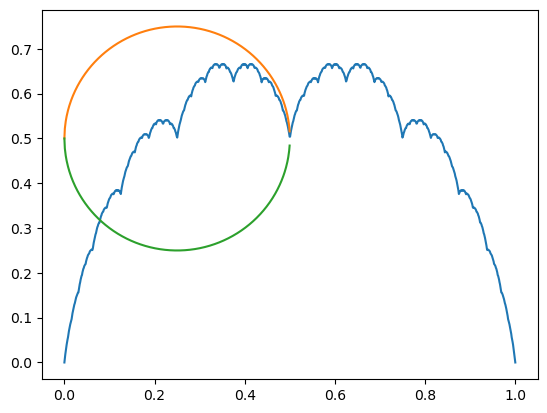

In [48]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)
plt.plot(x, blancmange(x, 10))
plt.plot(x, upper_circle(x, 1 / 4, 1 / 4, 1 / 2))
plt.plot(x, lower_circle(x, 1 / 4, 1 / 4, 1 / 2))

In [53]:
from scipy.integrate import quad

i1, err = quad(
    lambda x: min(lower_circle(x, 1 / 4, 1 / 4, 1 / 2), blancmange(x, 100)),
    0,
    0.5,
    limit=1000,
)
i2, err = quad(
    lambda x: min(upper_circle(x, 1 / 4, 1 / 4, 1 / 2), blancmange(x, 100)),
    0,
    0.5,
    limit=1000,
)

print(i1, i2, round(i2 - i1, 8))

0.1368398295407607 0.24999999999999994 0.11316017
